EN2550 Assignment 1
Index : 190557V
Name : K.G.C.P.Sandaruwan

Github link
https://github.com/Chathushka1999/EN2550_Assignments/tree/assignment1

Question (1)

In [38]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

Text(0.5, 1.0, 'look up table')

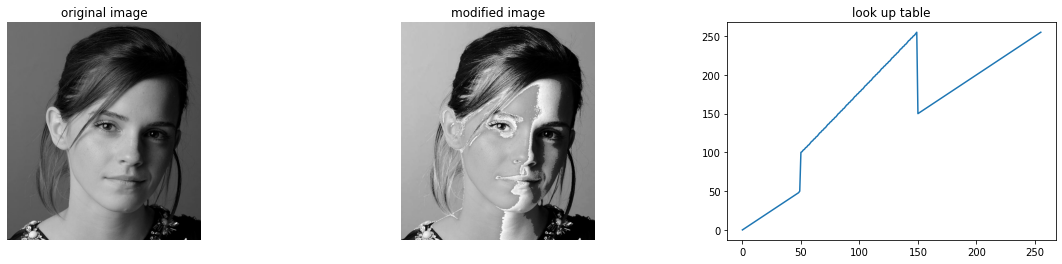

In [47]:
emma=cv.imread("emma_gray.jpg")
assert emma is not None
t1 = np.linspace(0,50,50)
t2=np.linspace(100,255,100)
t3=np.linspace(150,255,106)
table=np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
#modified=cv.LUT(emma,table)
emma=cv.cvtColor(emma,cv.COLOR_BGR2RGB)
modified=cv.LUT(emma,table)
modified=cv.cvtColor(modified,cv.COLOR_BGR2RGB)
fig,ax=plt.subplots(1,3)
fig.set_figwidth(20)
fig.set_figheight(4)
ax[0].imshow(emma)
ax[0].set_title("original image")
ax[0].axis("off")
ax[1].imshow(modified)
ax[1].set_title("modified image")
ax[1].axis("off")
ax[2].plot(table)
ax[2].set_title("look up table")
 



Question (2)

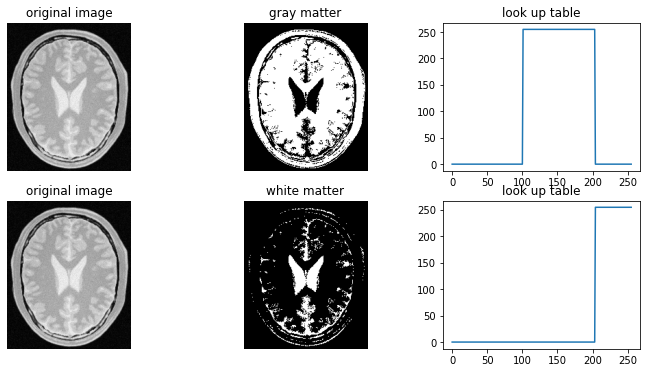

In [16]:
# 101-204 gray matter
# 204-256 white matter
brain=cv.imread("brain_proton_density_slice.png")
brain=cv.cvtColor(brain,cv.COLOR_BGR2RGB)
g1=np.linspace(0,0,101)
g2=np.linspace(255,255,103)
g3=np.linspace(0,0,52)
table_gm=np.concatenate((g1,g2,g3),axis=0).astype(np.uint8)
w1=np.linspace(0,0,204)
w2=np.linspace(255,255,52)
table_wm=np.concatenate((w1,w2),axis=0).astype(np.uint8)
grayMatter=cv.LUT(brain,table_gm)
whiteMatter=cv.LUT(brain,table_wm)
#brain=cv.cvtColor(brain,cv.COLOR_BGR2RGB)
fig,ax=plt.subplots(2,3)
fig.set_figwidth(12)
fig.set_figheight(6)
ax[0][0].set_title("original image")
ax[0][1].set_title("gray matter")
ax[0][0].axis("off")
ax[0][1].axis("off")
ax[0][2].set_title("look up table")
ax[0][0].imshow(brain)
ax[0][1].imshow(grayMatter)
ax[0][2].plot(table_gm)
ax[1][0].set_title("original image")
ax[1][1].set_title("white matter")
ax[1][0].axis("off")
ax[1][1].axis("off")
ax[1][2].set_title("look up table")
ax[1][0].imshow(brain)
ax[1][1].imshow(whiteMatter)
ax[1][2].plot(table_wm) 
plt.show()


Question (3)

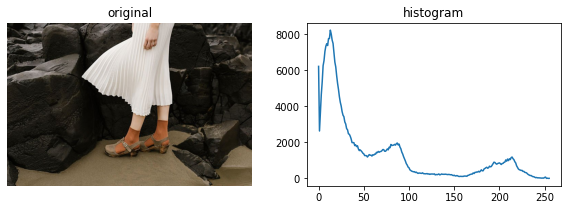

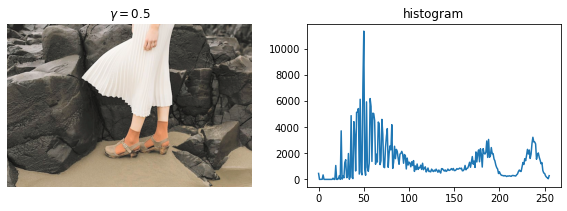

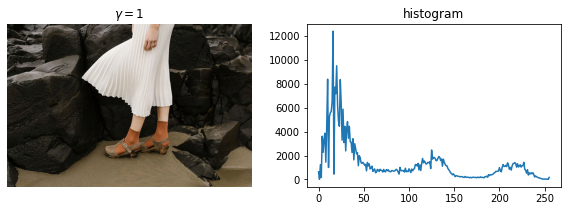

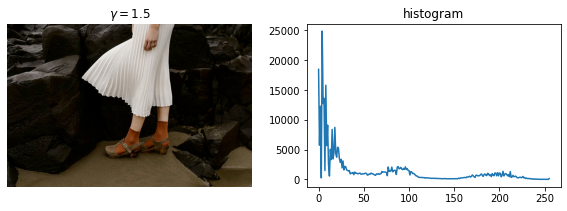

In [48]:
#gamma=3
original=cv.imread("highlights_and_shadows.jpg",cv.IMREAD_COLOR)
assert original is not None
original1=cv.cvtColor(original, cv.COLOR_BGR2Lab)
L, a, b = cv.split(original1)
gamma = [0.5, 1, 1.5]
hist1 = cv.calcHist([original], [0], None, [256], [0,256])
fig, ax = plt.subplots(1,2)
fig.set_figwidth(10)
fig.set_figheight(3)
original=cv.cvtColor(original,cv.COLOR_BGR2RGB)
ax[0].imshow(original)
ax[0].axis("off")
ax[0].set_title("original")
ax[1].plot(hist1)
ax[1].set_title("histogram")

plt.show()
for i in gamma:
    table = np.array([(j/255.0)**(i)*255.0 for j in L]).astype('uint8')

    #t = np.array([(p/255.0)**gamma[i]*(255.0) for p in L]).astype(np.uint8)
    corrected=cv.merge([table,a,b])
    corrected1=cv.cvtColor(corrected, cv.COLOR_Lab2RGB)
    hist2 = cv.calcHist([corrected1], [0], None, [256], [0,256])
    fig, ax = plt.subplots(1,2)
    fig.set_figwidth(10)
    fig.set_figheight(3)
    # ax[0].xaxis.tick_top()
    # ax[1].xaxis.tick_top()
    #ax[0].imshow(original1)
    ax[0].imshow(corrected1)
    ax[0].set_title("$\gamma = $"+ str(i))
    ax[0].axis("off")
    ax[1].plot(hist2)
    ax[1].set_title("histogram")
    plt.show()



Question (4)

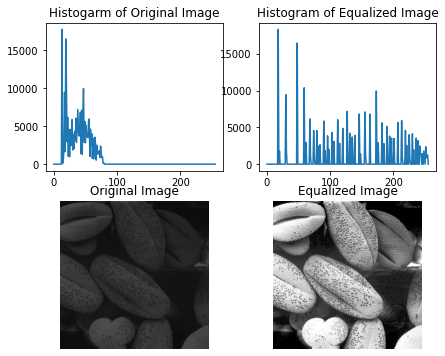

In [27]:
shells=cv.imread("shells.png",cv.IMREAD_GRAYSCALE)
assert shells is not None
hist1, bins = np.histogram(shells.ravel(), 256, [0, 256])
cdf = hist1.cumsum()
cdf_norm = np.round(cdf * (255.0))/(cdf.max())
equalized = cv.LUT(shells, cdf_norm)
hist2, hist_bins = np.histogram(equalized.ravel(), 256, [0,256])
shells = cv.cvtColor(shells, cv.COLOR_BGR2RGB) 
fig, ax = plt.subplots(2,2, figsize = (7,6))
ax[0,0].set_title('Histogarm of Original Image')
ax[0,0].plot(hist1)
ax[0,1].set_title('Histogram of Equalized Image')
ax[0,1].plot(hist2)
ax[1,0].set_title('Original Image')
ax[1,0].imshow(shells, cmap = 'gray')
ax[1,0].axis('off')
ax[1,1].set_title('Equalized Image')
ax[1,1].imshow(equalized, cmap = 'gray')
ax[1,1].axis('off')
plt.show()

Question (5)
(a) nearest neighbour

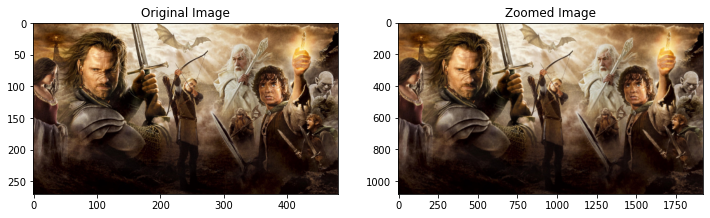

In [32]:
small = cv.imread("im01small.png", cv.IMREAD_COLOR)
scale = 4
rows = small.shape[0]*scale
cols = small.shape[1]*scale
zoomed = np.zeros((rows,cols,3),dtype=small.dtype)
for i in range (0,rows):
    for j in range (0,cols):
        for k in range (0,3):
            zoomed[i][j][k] = small[i//scale][j//scale][k]
fig, ax = plt.subplots(1,2 , figsize = (12,12))
ax[0].set_title('Original Image')
img = cv.cvtColor(small, cv.COLOR_BGR2RGB)
ax[0].imshow(img)
ax[1].set_title('Zoomed Image')
zoomed = cv.cvtColor(zoomed, cv.COLOR_BGR2RGB)
ax[1].imshow(zoomed)
plt.show()

Question (5)
(b) Bilinear interpllation

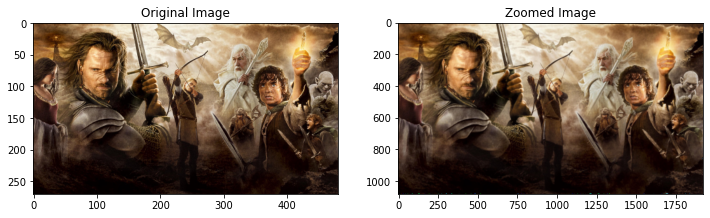

In [33]:
small = cv.imread("im01small.png", cv.IMREAD_COLOR)
scale = 4
rows = (small.shape[0]*scale)
cols = (small.shape[1]*scale)
zoomed = np.zeros((rows,cols,3),dtype=small.dtype)
for i in range (0,rows):
    for j in range (0,cols):
        for k in range (3): 
            P0 = i/scale
            Q0 = j/scale
            P = min(max(round(P0-0.5),0),small.shape[0]-2)
            Q = min(max(round(Q0-0.5),0),small.shape[1]-2)
            P_rat = P0 - P
            Q_rat = Q0 - Q
            pos00 = small[P][Q][k]
            pos01 = small[P][Q+1][k]
            pos10 = small[P+1][Q][k]
            pos11 = small[P+1][Q+1][k]
            first_m = pos00*(1-P_rat)+ pos10*(P_rat)
            second_m = pos01*(1-P_rat)+ pos11*(P_rat)
            zoomed[i][j][k] = round((first_m)*(1-Q_rat) + (second_m)*(Q_rat))  
fig, ax = plt.subplots(1,2 , figsize = (12,12))
ax[0].set_title('Original Image')
img = cv.cvtColor(small, cv.COLOR_BGR2RGB)
ax[0].imshow(img)
ax[1].set_title('Zoomed Image')
zoomed = cv.cvtColor(zoomed, cv.COLOR_BGR2RGB)
ax[1].imshow(zoomed)
plt.show()

Question (6)
(a)

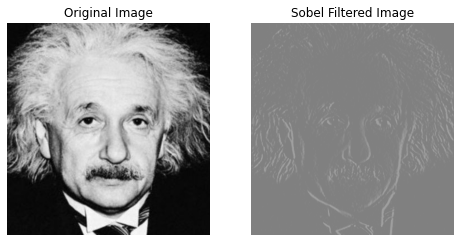

In [37]:
img = cv.imread("einstein.png", cv.IMREAD_GRAYSCALE)
kernel = np.array([(1,0,-1),(2,0,-2),(1,0,-1)], dtype='float')
img1 = cv.filter2D(img, -1, kernel)
fig, ax = plt.subplots(1, 2 , sharex = 'all', sharey = 'all', figsize = (8,8))
ax[0].imshow(img, cmap = 'gray')
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(img1, cmap = 'gray',vmax = 1020, vmin = -1020)
ax[1].set_title('Sobel Filtered Image')
ax[1].axis('off')
plt.show()


(b)

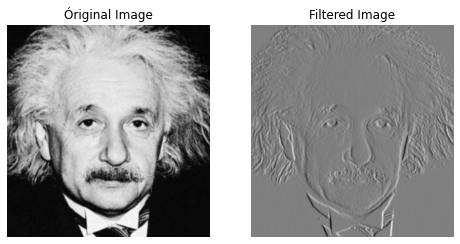

In [41]:
def filter (image, kernel):
    assert kernel.shape[0]%2 == 1 and kernel.shape[1]%2 == 1
    k_hh, k_hw = math.floor(kernel.shape[0]/2) , math.floor(kernel.shape[1]/2)
    h, w = image.shape
    image_float = cv.normalize(image.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)
    result = np.zeros(image.shape, 'float')
    for m in range(k_hh, h - k_hh):
        for n in range(k_hw, w - k_hw):
            result[m,n] = np.dot(image_float[m-k_hh:m + k_hh+1, n-k_hw:n+ k_hw+1].flatten(), kernel.flatten())
    return result
    
img = cv.imread("einstein.png", cv.IMREAD_GRAYSCALE)
sobelh = np.array([(1,0,-1),(2,0,-2),(1,0,-1)], dtype='float')
imgc = filter(img, sobelh)
imgc = imgc*255.0
fig, ax = plt.subplots(1,2, sharex= 'all', sharey= 'all', figsize = (8,8))
ax[0].imshow(img, cmap ='gray')
ax[0].set_title('Óriginal Image')
ax[0].axis('off')
ax[1].imshow(imgc, cmap ='gray', vmax = 780, vmin = -780)
ax[1].set_title('Filtered Image' )
ax[1].axis('off')
plt.show()

(c)

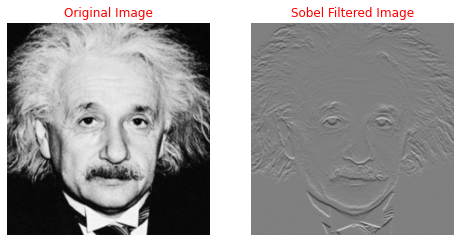

In [44]:
img = cv.imread("einstein.png", cv.IMREAD_GRAYSCALE).astype(np.float32)
array1 = np.array([[1],[2],[1]], dtype=np.float32)
array2 = np.array([[1, 0, -1]], dtype=np.float32)
imgc = cv.sepFilter2D(img, -1, array1, array2)
fig, ax = plt.subplots(1, 2 , sharex = 'all', sharey = 'all', figsize = (8,8))
ax[0].imshow(img, cmap = 'gray')
ax[0].set_title('Original Image', color = 'r')
ax[0].axis('off')
ax[1].imshow(imgc, cmap = 'gray', vmax = 1020, vmin = -1020 )
ax[1].set_title('Sobel Filtered Image', color ='r')
ax[1].axis('off')
plt.show()

Question (7)
(a)

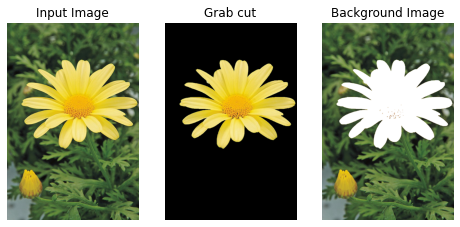

In [46]:
img = cv.imread("daisy.jpg", cv.IMREAD_COLOR)              
mask = np.zeros(img.shape[:2],np.uint8)                                                             
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,120,550,500)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
mask3 = (mask2 * 255).astype(np.uint8)
imgCut = img*mask2[:,:,np.newaxis]
newImg = cv.cvtColor(img, cv.COLOR_BGR2RGB)
newCut = cv.cvtColor(imgCut, cv.COLOR_BGR2RGB)
backImg = cv.cvtColor(mask3, cv.COLOR_BGR2RGB)+(newImg - newCut)
fig, ax = plt.subplots(1,3, sharex = 'all', sharey = 'all', figsize = (8,8))
ax[0].imshow(newImg)
ax[0].set_title('Input Image')
ax[0].axis('off')
ax[1].imshow(newCut)
ax[1].set_title('Grab cut' )
ax[1].axis('off')
ax[2].imshow(backImg)
ax[2].set_title('Background Image' )
ax[2].axis('off')
plt.show()